<h1 style='font-family:times new roman;'> <center> Fortune 1000 Exploratory Analysis </center> </h1>


***

<h2 style ='font-family:times new roman'>Introduction</h2>

<p style ='font-size=16px;font-family:times new roman'>Historically, companies featured in the Fortune 500 list are considered amongst the best American businesses. The companies are ranked by revenue, but other relevant information is included such as the location of the company’s headquarters, and the sector it belongs in. This analysis seeks to explore the companies featured in the Fortune 1000 list and identify any interesting trends.</p>

<h2 style='font-family:times new roman'>Data</h2>

<p style='font-size:16px;font-family:times new roman'>The Fortune 1000 list is available through Fortune.com [1]. The dataset used in this analysis is publicly available on Kaggle [2]. </p>

<h2 style='font-family:times new roman'>Setting Up Enviroment in Python </h2>


<p style='font-size:16px;font-family:times new roman'> Importing Libraries </p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

<p style='font-size:16px;font-family:times new roman'>Importing dataset</p>

In [ ]:
df = pd.read_csv("../input/fortune-500-data-2021/Fortune_1000.csv")

<h2 style='font-family:times new roman'>Data Cleaning </h2>

<p style='font-size:16px;font-family:times new roman'>Preview data set in order to identify any null values and errors.</p>

In [ ]:
print(df.info())

<p style='font-size:16px;font-family:times new roman'>Remove white space around column names.
Convert all column names into lowercase.</p>

In [ ]:
df.columns = df.columns.str.strip().str.lower()

<p style='font-size:16px;font-family:times new roman'>Private corporations have null values in the 'ticker symbol' column. Null values are replaced with N/A in to prevent any errors during analysis </p>

In [ ]:
df['ticker'].fillna('N/A', inplace= True)

<p style='font-size:16px;font-family:times new roman'>Replace null values for the CEO column.</p>

In [ ]:
df['ceo'].fillna('N/A', inplace = True)

<p style='font-size:16px;font-family:times new roman'> Added missing profit values for the company Hexion. </p>

In [ ]:
print(df.loc[df['company']== 'Hexion'])
df.at[716,'profit'] = -230

<p style='font-size:16px;font-family:times new roman'>Removed iheartmedia from dataframe as missing information could not be located for the company.</p

In [ ]:
print(df.loc[df['company']== 'iHeartMedia'])
df= df.drop(df.index[667])

<p style='font-size:16px;font-family:times new roman'>Change the datatype in the profit column to numerical.</p>

In [ ]:
df['profit']= df['profit'].astype(float)

<p style='font-size:16px;font-family:times new roman'>Change data types in several columns to categorical data.</p>

In [ ]:
df['ceo_woman'] = np.where(df['ceo_woman'] == 'yes', True, False)
df['ceo_founder']=np.where(df['ceo_founder']== 'yes', True, False)
df['newcomer']= np.where(df['newcomer']== 'yes', True, False)
df['profitable']=np.where(df['profitable']=='yes', True, False)

<p style='font-size:16px;font-family:times new roman'>Check for anymore null values.</p>

In [ ]:
df.isnull().any()

<p style='font-size:16px;font-family:times new roman'>Check to make sure data types where updated properly.</p>

In [ ]:
print(df.info())

<h2 style='font-family:times new roman'>Analysis</h2>

<p style='font-size:16px;font-family:times new roman'>1. Where are most headquarters located?</p>


In [ ]:
state_count= df[['sector','company','state']]
state_count = state_count.groupby(["state"], as_index = False)["company"].count()
state_count.rename(columns = {'company':'company_count'}, inplace=True)
state_count.sort_values(by='company_count',ascending=False,inplace=True)
state_count.head(10)

<p style='font-size:16px;font-family:times new roman'>The data shows that California, Texas, and New York are the states with the most Fortune 1000 companies. These three states are also amongst the most populated states in the United States, which each state having over 19 million residents. It makes sense for businesses to be in highly populated regions like California and New York. It is easier to find talent in populous cities as well as a large pool of clients. California and New York are known for high housing costs and taxes. This has led many businesses to move to states like Texas and Florida[3].</p>

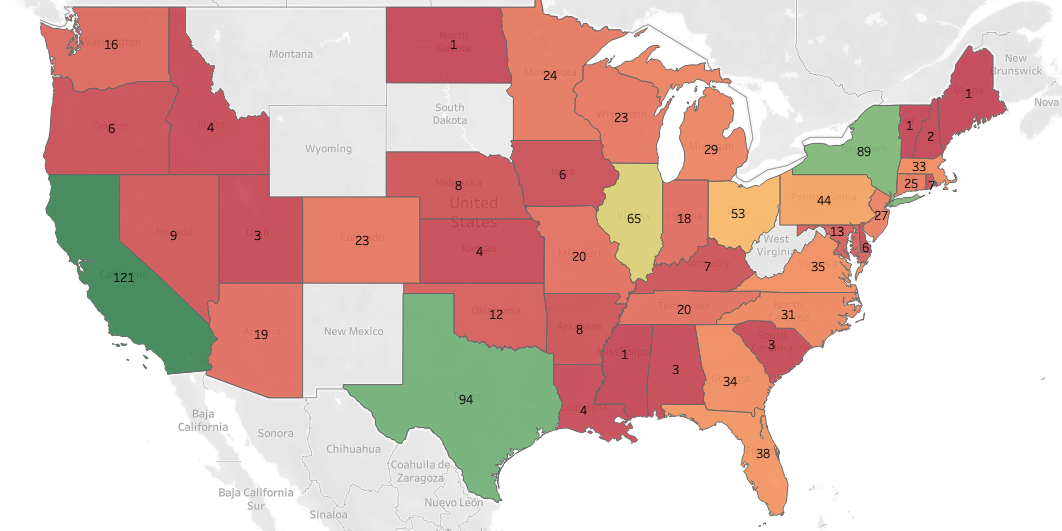

<p style='font-size:16px;font-family:times new roman'>2. How many companies have women CEOs?</p>

In [ ]:
woman_df = df[['sector','company','ceo_woman']]
woman_df = df[df['ceo_woman']==True]
woman_df=woman_df.groupby(["sector"], as_index=False)[
    "ceo_woman"].count().sort_values(by='ceo_woman',ascending=False)
woman_df

<p style='font-size:16px;font-family:times new roman'>From the one thousand companies that are feature in Fortune’s list, a mere 7% of those companies have a woman CEO. </p>

In [ ]:
# # Color Palette 
my_color_pal = [
    'MediumSeaGreen',
    'LightSeaGreen',
    'MediumAquaMarine',
    'LightSkyBlue',
    'LightSteelblue',
    'PowderBlue',
    'Plum',
    'LightSalmon',
    'LightPink',
    'Moccasin',
]

In [ ]:
y = woman_df['sector']
width = woman_df['ceo_woman']
plt.barh(y=y, width=width, color=my_color_pal, edgecolor='Gray')
plt.title('Number of Women CEOs per Sector', fontsize=18, 
          color = 'MediumSeaGreen')
percent_woman = round((woman_df['ceo_woman'].sum()/1000 *100),0)
percent_retail = round((woman_df.iloc[0,1]/woman_df['ceo_woman'].sum()*100),0)
plt.annotate(text=(
    '''
    In the Fortune 1000 list of companies,
    only {pw}% of the CEOs are women
    and {pr}% of those women are in the retail sector.
    '''.format(
      pw=percent_woman, pr=percent_retail)), xy=(3,10), fontsize=9,
backgroundcolor='Moccasin')

<p style='font-size:16px;font-family:times new roman'>Jane Fraser, Chief Executive Officer of Citi, is the first woman CEO in the firm’s history. The finance company serves millions of consumers, businesses, and institutions across 160 countries. Jane Fraser has been with Citi for 17 years before being appointed as CEO [4]. Safra A. Catz has served as chief executive officer of Oracle Corporation since 2014. She began working at Oracle in 1999 [5]. Interestingly, Oracle is one of the many tech companies that moved its headquarters from California to Austin, Texas. Mary T. Barra is the only woman CEO in the dataset within the motor vehicles sector. Barra has been the chair and chief executive officer of General Motors since January 15, 2014. She has been with General Motors for more than thirty years and the CEO for over seven years [6]. More diversity is necessary in the business world. Although the number of women running Fortune 500 businesses hit a record in 2021, there is still a very large gap between the number of men that are CEOs (93%) and the number of women that are CEOs. As for racial diversity, this year marks the first time that two Black women, Roz Brewer and Thasunda Brown, are running Fortune 500 businesses [7]. Before being appointed the CEO of Walgreens Boots Alliance, Roz Brewer served as the COO of Starbucks and CEO of Sam’s Club [8]. Accomplished businesswoman, Thasunda Brown Duckett, was the CEO of Chase Consumer Banking for over four years. In May 2021, she became the CEO of the Teachers Insurance and Annuity Association of America (TIAA) [9].</p>


In [ ]:
woman_ceo = df[['company','profit','sector','ceo_woman','ceo']]
woman_ceo = woman_ceo[woman_ceo['ceo_woman']== True].sort_values(by='profit', ascending=False)
woman_ceo.head(3)   


<p style='font-size:16px;font-family:times new roman'>3. Which sectors are the most profitable?</p>

In [ ]:
# # Top performing Sector
sector_df=df[['company','profit','sector']]
sector_sum_df=sector_df.groupby(['sector'], as_index = False).sum('profit').sort_values(
    by=['profit'], ascending = False)

sector_sum_df.rename(columns = {
    'sector':'sector',
    'profit':'sum_profit'}, inplace = True)

sector_sum_df = sector_sum_df.head(5)

sector_sum_df.head(3)

<p style='font-size:16px;font-family:times new roman'>The sectors that are the most profitable within Fortune 1000 are financials, technology, and healthcare. The financial sector is made up of firms and institutions that provide financial services. Banks, investment companies and insurance companies make up the financial sector. It is important that the financial sector remains profitable as its strength is a sign of a healthy economy [10]. The most profitable company in the list is Berkshire Hathway, a conglomerate holding company. Holding companies’ primary business is holding a controlling interest in the securities of other companies [11]. It is no surprise that the technology sector is rapidly growing in the United States. The technology sector is comprised of companies that develop software and companies that provide information technology consulting and services. According to Fidelity Investments, the tech sector has increased 265.67% over the last five years [12].</p>

In [ ]:
squarify.plot(sizes=sector_sum_df['sum_profit'],
              label=sector_sum_df['sector'],
              alpha=0.8,
              text_kwargs={'fontsize':10},
              color=my_color_pal)

<h2 style='font-family:times new roman'>Conclusion</h2>

<p style='font-size:16px;font-family:times new roman'>Analyzing the companies featured in the Fortune 1000 list is a great way to get a snapshot of our economy. Through this exploratory analysis we have identified the regions in the US that are the most popular amongst Fortune companies. Unsurprisingly, large metropolitan areas like California and New York are home to many headquarters. However, states like Texas and Florida have seen a large increase in number of corporations. While the writers at Fortune, celebrate the inclusion of more women CEOs in the business world, it is evident that there is still a large gap as companies with women CEOs only make up 7%. Lastly, we revealed that finance and technology are amongst the most profitable business sectors.</p>

<h2 style='font-family:times new roman'>References</h2>

1.	[Fortune Website](https://fortune.com)
2.	[Kaggle Dataset](https://www.kaggle.com/winston56/fortune-500-data-2021)
3.	[Texas Attracts Big Businesses](https://www.cnbc.com/2021/03/20/how-texas-attracts-big-businesses-billionaires-from-california.html)
4.	[Jane Fraser Linkdin profile](https://www.linkedin.com/in/jane-fraser-3292068/)
5.	[Safra A. Catz](https://www.oracle.com/corporate/executives/catz/)
6.	[Mary T Barra](https://www.linkedin.com/in/mary-barra/)
7.	[Women CEO](https://fortune.com/2021/06/02/female-ceos-fortune-500-2021-women-ceo-list-roz-brewer-walgreens-karen-lynch-cvs-thasunda-brown-duckett-tiaa/)
8.	[Rosalind ‘Roz’ Brewer](https://en.wikipedia.org/wiki/Rosalind_Brewer)
9.	[Thasunda Brown Duckett](https://www.cnbc.com/2021/03/01/tiaa-ceo-thasunda-brown-duckett-on-accepting-lowest-job-offer-after-college.html)
10.	[Financial Sector Defined](https://www.investopedia.com/terms/f/financial_sector.asp)
11.	[Holding Company defined](https://www.investopedia.com/terms/h/holdingcompany.asp)
12.	[Technology Sector Growth](https://eresearch.fidelity.com/eresearch/markets_sectors/sectors/sectors_in_market.jhtml?tab=learn&sector=45)


<h2 style='font-family:times new roman'>Tableu Dashboard</h2>

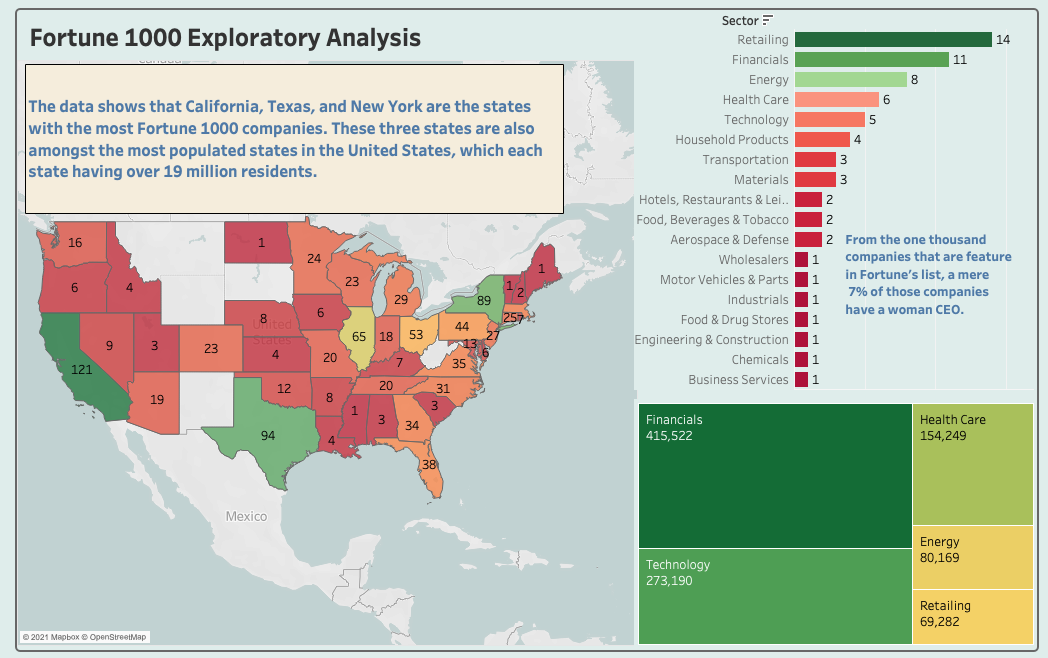